In [1]:
# Import libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy .stats import norm 
import seaborn as sns
from matplotlib.pyplot import figure
from pylab import cm
import matplotlib.font_manager as fm
import matplotlib as mpl
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.patches import Polygon
import matplotlib.ticker as mtick
from sklearn.metrics import r2_score
from itertools import combinations
import seaborn as sns
from matplotlib.patches import Patch, Polygon
import os

# Create dataset section

In [2]:
# unique scenario duos
pd.read_csv("./crispy_3419_companies.csv")["scenario_duo"].unique() 

array(['IPR2021_baseline&IPR2021_FPS', 'IPR2021_baseline&IPR2021_RPS',
       'NGFS2021_GCAM_NDC&NGFS2021_GCAM_B2DS',
       'NGFS2021_GCAM_NDC&NGFS2021_GCAM_DN0',
       'NGFS2021_GCAM_NDC&NGFS2021_GCAM_DT',
       'NGFS2021_GCAM_NDC&NGFS2021_GCAM_NZ2050',
       'NGFS2021_MESSAGE_NDC&NGFS2021_MESSAGE_B2DS',
       'NGFS2021_MESSAGE_NDC&NGFS2021_MESSAGE_DN0',
       'NGFS2021_MESSAGE_NDC&NGFS2021_MESSAGE_DT',
       'NGFS2021_MESSAGE_NDC&NGFS2021_MESSAGE_NZ2050',
       'NGFS2021_REMIND_NDC&NGFS2021_REMIND_B2DS',
       'NGFS2021_REMIND_NDC&NGFS2021_REMIND_DN0',
       'NGFS2021_REMIND_NDC&NGFS2021_REMIND_DT',
       'NGFS2021_REMIND_NDC&NGFS2021_REMIND_NZ2050',
       'Oxford2021_base&Oxford2021_fast',
       'WEO2021_STEPS&WEO2021_NZE_2050', 'WEO2021_STEPS&WEO2021_SDS'],
      dtype=object)

# Results section

In [3]:
def make_data(x_scenario_duo, y_scenario_duo):
    ##B2DS run
    data=pd.read_csv("./crispy_3419_companies.csv")
    
    # Filter the DataFrame to select only rows where 'scenario_duo' is 'NGFS2021_GCAM_NDC&NGFS2021_GCAM_B2DS'
    gcam_df = data[data['scenario_duo'] == x_scenario_duo]
    
    # Calculate 'GCAMROC' as 'net_present_value_rate_of_change' for the filtered rows
    gcam_df['GCAM_company_value_changes'] = gcam_df['net_present_value_rate_of_change']
    
    # Calculate 'GCAMpddiff' as 'pd_difference' for the filtered rows
    gcam_df['GCAM_pd_difference'] = gcam_df['pd_difference']
    
    # Merge the calculated values back into the original DataFrame using 'company_name' as the key
    data = data.merge(gcam_df[['company_name', 'GCAM_company_value_changes', 'GCAM_pd_difference']], on='company_name', how='left')
    
    # Filter the DataFrame to keep only the specified scenario duos
    data = data[data['scenario_duo'] == y_scenario_duo]
    
    return data


In [4]:
def make_npv_quadrants_plot(data, xlab_scenario, ylab_scenario):
    ###########Adjust Plots with 45°C line
    ######################################################################################################################################################
    # Comparison value change ##Total
    ######################################################################################################################################################
    plt.style.use(['default'])
    
    #equity_company_value_changes_standard_nodup_reordered = equity_company_value_changes_standard_nodup_reordered[
    #    equity_company_value_changes_standard_nodup_reordered['sector'] == 'Power'
    #]
    
    plt.figure(figsize=(20, 10), dpi=250) # CHANGE FIRST TWO NUMBERS TO CHANGE FONT SIZE AND DIMENSION OF CHART
    
    label = {'IPR2021_FPS':'IPR2021_FPS', 'IPR2021_RPS':'IPR2021_RPS', 'NGFS2021_GCAM_B2DS':'NGFS2021_GCAM_B2DS', 'Oxford2021_fast':'NGFS2021_MESSAGE_B2DS', 'NGFS2021_REMIND_B2DS':'NGFS2021_REMIND_B2DS', 'WEO2021_SDS':'WEO2021_SDS'}
    
    
    plt.xlabel(xlab_scenario, fontsize=24) 
    plt.ylabel(ylab_scenario, fontsize = 24)
    plt.xlim(-1,1) # CHANGE HERE TO ZOOM ON DIFFERENT QUADRANTS
    plt.ylim(-1,4) # CHANGE HERE TO ZOOM ON DIFFERENT QUADRANTS
    plt.hlines(y=0, xmin=-90, xmax=90, linewidth=1, color="grey")
    plt.vlines(x=0, ymin=-90, ymax=180, linewidth=1, color="grey")
    
    # Define the coordinates for each quadrant
    quadrant1_coords = [[-1, -1], [-1, 0], [0, 0], [0, -1]]
    quadrant2_coords = [[-1, 0], [-1, 4], [0, 4], [0, 0]]
    quadrant3_coords = [[0, 0], [0, 4], [1, 4], [1, 0]]
    quadrant4_coords = [[0, -1], [0, 0], [1, 0], [1, -1]]
    
    # Create polygons for each quadrant with desired colors
    quadrant1_poly = Polygon(quadrant1_coords, facecolor='lightcoral', alpha=0.3)
    quadrant2_poly = Polygon(quadrant2_coords, facecolor='lightgreen', alpha=0.3)
    quadrant3_poly = Polygon(quadrant3_coords, facecolor='lightblue', alpha=0.3)
    quadrant4_poly = Polygon(quadrant4_coords, facecolor='lightyellow', alpha=0.3)
    
    # Add the polygons to the plot
    ax = plt.gca()
    ax.add_patch(quadrant1_poly)
    ax.add_patch(quadrant2_poly)
    ax.add_patch(quadrant3_poly)
    ax.add_patch(quadrant4_poly)
    #plt.scatter(equity_company_value_changes_standard_nodup_reordered[equity_company_value_changes_standard_nodup_reordered['shock_scenario']==selected_scenario]['GCAM_company_value_changes'], equity_company_value_changes_standard_nodup_reordered[equity_company_value_changes_standard_nodup_reordered['shock_scenario']==selected_scenario]['OtherScenarios_company_value_changes'],s = 8, c=equity_company_value_changes_standard_nodup_reordered[equity_company_value_changes_standard_nodup_reordered['shock_scenario']==selected_scenario]['shock_scenario'].map(colors), label=equity_company_value_changes_standard_nodup_reordered[equity_company_value_changes_standard_nodup_reordered['shock_scenario']==selected_scenario]['shock_scenario'])
    
    plt.scatter(data[['GCAM_company_value_changes']], 
                data[['net_present_value_rate_of_change']],
                s = 8, 
                c="grey")
    
    plt.title("Company Value Change (%)", fontsize = 24)
    #plt.legend(handles=legend_elements)
    plt.xticks(plt.xticks()[0], ['{:,.0%}'.format(x) for x in plt.xticks()[0]], fontsize = 18)
    plt.yticks(plt.yticks()[0], ['{:,.0%}'.format(x) for x in plt.yticks()[0]], fontsize = 18)
    
    
    # Add a 45° line
    plt.plot([-1, 1], [-1, 1], linestyle='dashed', color=(0,0,0,1), linewidth = 2.5)
    
    return plt.gcf(), plt.gca()

In [5]:
def make_pd_quadrants_plot(data, xlab_scenario,  ylab_scenario):
    ###########Adjuste Plots with 45°C line
    ######################################################################################################################################################
    # Comparison PD Change per scenario 
    ######################################################################################################################################################
    plt.style.use(['default'])
    #plt.rcParams['font.family'] = 'Arial'
    
    plt.figure(figsize=(20, 10), dpi=250) # CHANGE FIRST TWO NUMBERS TO CHANGE FONT SIZE AND DIMENSION OF CHART
    
    label = {'IPR2021_FPS':'IPR2021_FPS', 'IPR2021_RPS':'IPR2021_RPS', 'NGFS2021_GCAM_B2DS':'NGFS2021_GCAM_B2DS', 'Oxford2021_fast':'NGFS2021_MESSAGE_B2DS', 'NGFS2021_REMIND_B2DS':'NGFS2021_REMIND_B2DS', 'WEO2021_SDS':'WEO2021_SDS'}
    
    
    plt.xlabel(xlab_scenario, fontsize=24) 
    plt.ylabel(ylab_scenario, fontsize = 24)
    plt.xlim(-0.4,0.8) # CHANGE HERE TO ZOOM ON DIFFERENT QUADRANTS
    plt.ylim(-0.4,0.8) # CHANGE HERE TO ZOOM ON DIFFERENT QUADRANTS
    plt.hlines(y=0, xmin=-90, xmax=90, linewidth=1, color="grey")
    plt.vlines(x=0, ymin=-90, ymax=180, linewidth=1, color="grey")
    
    # Define the coordinates for each quadrant
    quadrant1_coords = [[-1, -1], [-1, 0], [0, 0], [0, -1]]
    quadrant2_coords = [[-1, 0], [-1, 4], [0, 4], [0, 0]]
    quadrant3_coords = [[0, 0], [0, 4], [1, 4], [1, 0]]
    quadrant4_coords = [[0, -1], [0, 0], [1, 0], [1, -1]]
    
    # Create polygons for each quadrant with desired colors
    quadrant1_poly = Polygon(quadrant1_coords, facecolor='lightcoral', alpha=0.3)
    quadrant2_poly = Polygon(quadrant2_coords, facecolor='lightgreen', alpha=0.3)
    quadrant3_poly = Polygon(quadrant3_coords, facecolor='lightblue', alpha=0.3)
    quadrant4_poly = Polygon(quadrant4_coords, facecolor='lightyellow', alpha=0.3)
    
    # Add the polygons to the plot
    ax = plt.gca()
    ax.add_patch(quadrant1_poly)
    ax.add_patch(quadrant2_poly)
    ax.add_patch(quadrant3_poly)
    ax.add_patch(quadrant4_poly)
    
    #plt.scatter(equity_company_value_changes_standard_nodup_reordered[equity_company_value_changes_standard_nodup_reordered['shock_scenario']==selected_scenario]['GCAM_pd_difference'], equity_company_value_changes_standard_nodup_reordered[equity_company_value_changes_standard_nodup_reordered['shock_scenario']==selected_scenario]['OtherScenarios_pd_difference'],s = 8, c=equity_company_value_changes_standard_nodup_reordered[equity_company_value_changes_standard_nodup_reordered['shock_scenario']==selected_scenario]['shock_scenario'].map(colors), label=equity_company_value_changes_standard_nodup_reordered[equity_company_value_changes_standard_nodup_reordered['shock_scenario']==selected_scenario]['shock_scenario'])
    plt.scatter(data[['GCAM_pd_difference']], 
                data[['pd_difference']],
                s = 8, 
                c="grey")
    
    plt.title("Company PD Difference", fontsize = 24)
    #plt.legend(handles=legend_elements)
    plt.xticks(plt.xticks()[0], ['{:,.0%}'.format(x) for x in plt.xticks()[0]], fontsize = 18)
    plt.yticks(plt.yticks()[0], ['{:,.0%}'.format(x) for x in plt.yticks()[0]], fontsize = 18)
    
    
    # Add a 45° line
    plt.plot([-1, 1], [-1, 1], linestyle='dashed', color=(0,0,0,1), linewidth = 2.5)
    
    return plt.gcf(), plt.gca()

In [ ]:
scenarios_xy = [
    ("NGFS2021_GCAM_NDC&NGFS2021_GCAM_B2DS", "GCAM", "Oxford2021_base&Oxford2021_fast", "Oxford"),
    ("NGFS2021_GCAM_NDC&NGFS2021_GCAM_B2DS", "GCAM", "IPR2021_baseline&IPR2021_FPS", "IPR FPS"),
    ("NGFS2021_GCAM_NDC&NGFS2021_GCAM_B2DS", "GCAM", "NGFS2021_REMIND_NDC&NGFS2021_REMIND_B2DS", "REMIND"),
    ("NGFS2021_MESSAGE_NDC&NGFS2021_MESSAGE_B2DS", "MESSAGE", "WEO2021_STEPS&WEO2021_SDS", "WEO SDS"),
    ("NGFS2021_MESSAGE_NDC&NGFS2021_MESSAGE_B2DS", "MESSAGE", "NGFS2021_REMIND_NDC&NGFS2021_REMIND_B2DS", "REMIND"),
    ("NGFS2021_MESSAGE_NDC&NGFS2021_MESSAGE_B2DS", "MESSAGE", "IPR2021_baseline&IPR2021_FPS", "IPR FPS")
]

output_folder = "./out_plots"
os.makedirs(output_folder, exist_ok=True) 
for scenario_x, Scenario_x, scenario_y, Scenario_y in scenarios_xy:
    data = make_data(scenario_x, scenario_y)
    
    fig, ax = make_pd_quadrants_plot(data, Scenario_x, Scenario_y)
    fig.savefig(os.path.join(output_folder, "pd_"+Scenario_x+"&"+Scenario_y+".jpg"))
    
    fig, ax = make_npv_quadrants_plot(data, Scenario_x, Scenario_y)
    fig.savefig(os.path.join(output_folder, "npv_"+Scenario_x+"&"+Scenario_y+".jpg"))    

[Text(-1.0, 0, '-100%'),
 Text(-0.5, 0, '-50%'),
 Text(0.0, 0, '0%'),
 Text(0.5, 0, '50%'),
 Text(1.0, 0, '100%'),
 Text(1.5, 0, '150%'),
 Text(2.0, 0, '200%')]

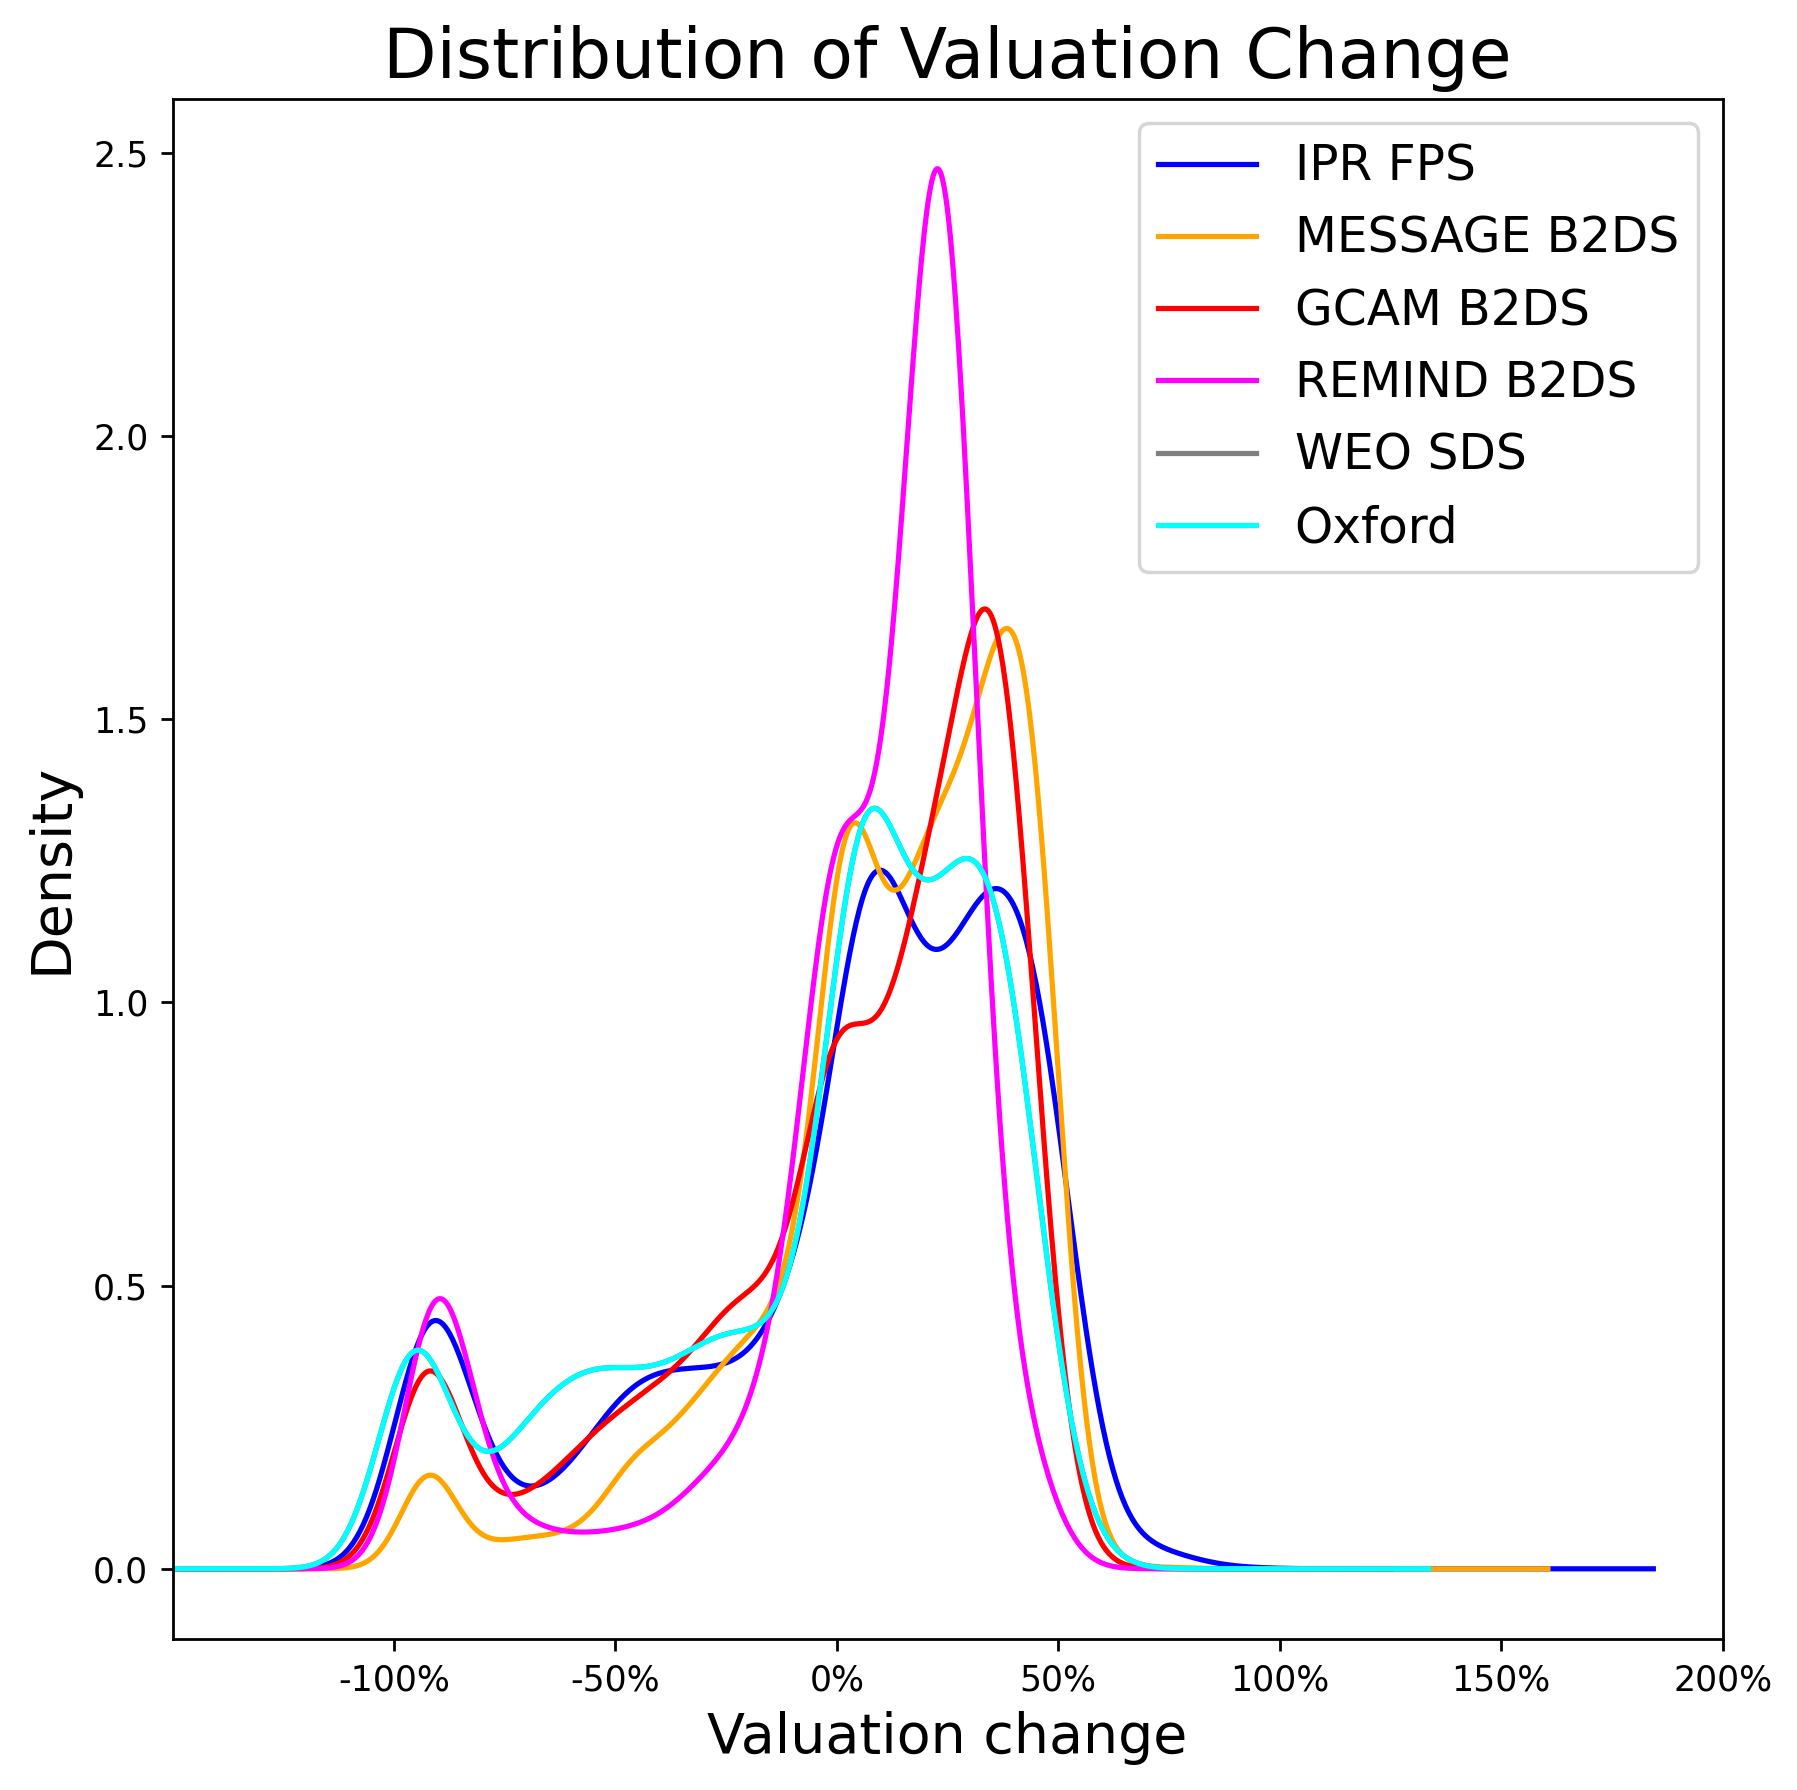

In [31]:
data=pd.read_csv("./crispy_3419_companies.csv")

#Chart settings
mpl.rcParams['font.family'] = 'Times New Roman'
plt.style.use('default')
plt.figure(figsize=(8, 8), dpi=250)# CHANGE FIRST TWO NUMBERS TO CHANGE FONT SIZE AND DIMENSION OF CHART
plt.xlim(-1.5,2)
plt.xticks(np.arange(-1, 2.25, 0.5), ['{:,.0%}'.format(x) for x in np.arange(-1, 2.25, 0.5)])

selected_sectors=["Power"] # CHANGE HERE TO SELECT ONLY SOME SECTORS

#colors = {'IPR2021_FPS':'red', 'IPR2021_RPS':'green', 'NGFS2021_GCAM_B2DS':'blue', 'Oxford2021_fast':'orange', 'NGFS2021_REMIND_B2DS':'gray', 'WEO2021_SDS':'blue'}


ax1=data[(data["shock_scenario"]=="IPR2021_FPS")& (data["sector"].isin(selected_sectors))]['net_present_value_rate_of_change'].plot(kind='density', label='IPR FPS', color ="blue")
ax2=data[(data["shock_scenario"]=="NGFS2021_MESSAGE_B2DS")& (data["sector"].isin(selected_sectors))]['net_present_value_rate_of_change'].plot(kind='density', label='MESSAGE B2DS',color ="orange")
ax3=data[(data["shock_scenario"]=="NGFS2021_GCAM_B2DS")& (data["sector"].isin(selected_sectors))]['net_present_value_rate_of_change'].plot(kind='density', label='GCAM B2DS', color ="red")
ax4=data[(data["shock_scenario"]=="NGFS2021_REMIND_B2DS")& (data["sector"].isin(selected_sectors))]['net_present_value_rate_of_change'].plot(kind='density', label='REMIND B2DS',color ="magenta")
ax5=data[(data["shock_scenario"]=="WEO2021_SDS")& (data["sector"].isin(selected_sectors))]['net_present_value_rate_of_change'].plot(kind='density', label='WEO SDS', color ="gray")
ax5=data[(data["shock_scenario"]=="WEO2021_SDS")& (data["sector"].isin(selected_sectors))]['net_present_value_rate_of_change'].plot(kind='density', label='Oxford', color ="cyan")

plt.title("Distribution of Valuation Change", fontsize=20)
plt.xlabel('Valuation change', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend(fontsize=14)
vals = ax1.get_xticks()
#plt.xticks(fontsize=12.5)
#plt.yticks(fontsize=14)

ax1.set_xticklabels(['{:,.0%}'.format(x) for x in vals])


[Text(-1.0, 0, '-100%'),
 Text(-0.5, 0, '-50%'),
 Text(0.0, 0, '0%'),
 Text(0.5, 0, '50%'),
 Text(1.0, 0, '100%'),
 Text(1.5, 0, '150%'),
 Text(2.0, 0, '200%'),
 Text(2.5, 0, '250%'),
 Text(3.0, 0, '300%'),
 Text(3.5, 0, '350%'),
 Text(4.0, 0, '400%')]

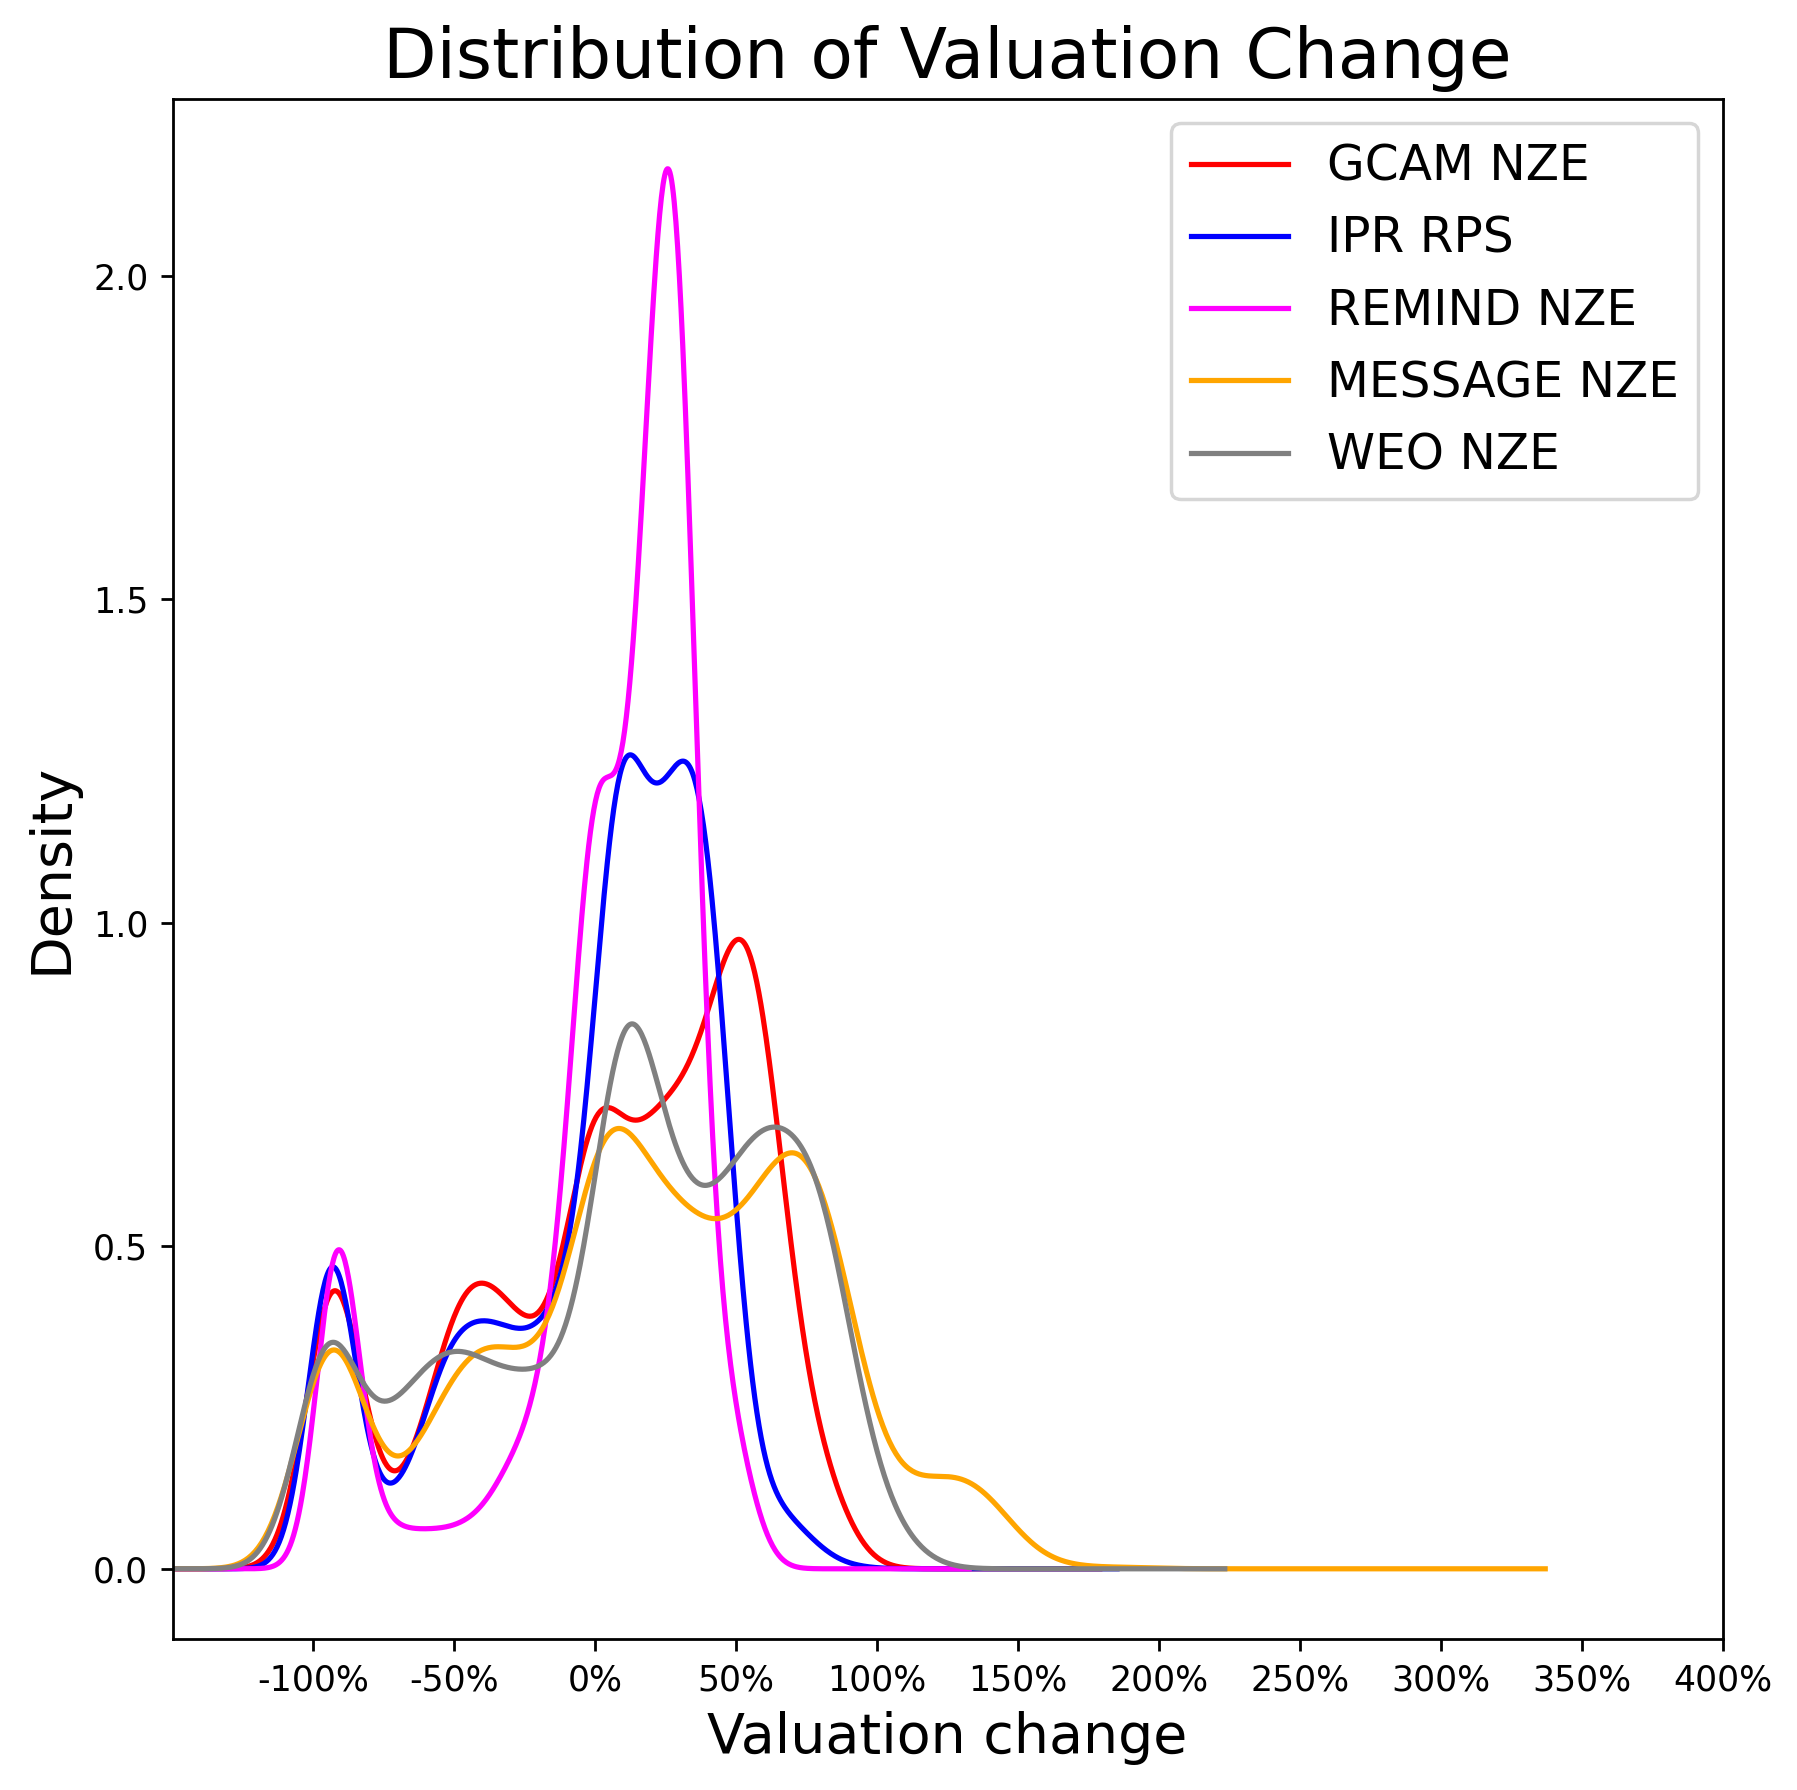

In [32]:
data = pd.read_csv("./crispy_3419_companies.csv")

#Chart settings
mpl.rcParams['font.family'] = 'Times New Roman'
plt.style.use('default')
plt.figure(figsize=(8, 8), dpi=250)# CHANGE FIRST TWO NUMBERS TO CHANGE FONT SIZE AND DIMENSION OF CHART
plt.xlim(-1.5,4)
plt.xticks(np.arange(-1, 4.25, 0.5), ['{:,.0%}'.format(x) for x in np.arange(-1, 4.25, 0.5)])

selected_sectors=["Power"] # CHANGE HERE TO SELECT ONLY SOME SECTORS

#colors = {'IPR2021_FPS':'red', 'IPR2021_RPS':'green', 'NGFS2021_GCAM_B2DS':'blue', 'Oxford2021_fast':'orange', 'NGFS2021_REMIND_B2DS':'gray', 'WEO2021_SDS':'blue'}


ax1=data[(data["shock_scenario"]=="NGFS2021_GCAM_NZ2050")& (data["sector"].isin(selected_sectors))]['net_present_value_rate_of_change'].plot(kind='density', label='GCAM NZE', color ="red")
ax2=data[(data["shock_scenario"]=="IPR2021_RPS")& (data["sector"].isin(selected_sectors))]['net_present_value_rate_of_change'].plot(kind='density', label='IPR RPS',color ="blue")
ax3=data[(data["shock_scenario"]=="NGFS2021_REMIND_NZ2050")& (data["sector"].isin(selected_sectors))]['net_present_value_rate_of_change'].plot(kind='density', label='REMIND NZE', color ="magenta")
ax4=data[(data["shock_scenario"]=="NGFS2021_MESSAGE_NZ2050")& (data["sector"].isin(selected_sectors))]['net_present_value_rate_of_change'].plot(kind='density', label='MESSAGE NZE', color ="orange")
ax5=data[(data["shock_scenario"]=="WEO2021_NZE_2050")& (data["sector"].isin(selected_sectors))]['net_present_value_rate_of_change'].plot(kind='density', label='WEO NZE',color ="gray")

plt.title("Distribution of Valuation Change", fontsize=20)
plt.xlabel('Valuation change', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend(fontsize=14)
vals = ax1.get_xticks()
#plt.xticks(fontsize=12.5)
#plt.yticks(fontsize=14)

ax1.set_xticklabels(['{:,.0%}'.format(x) for x in vals])


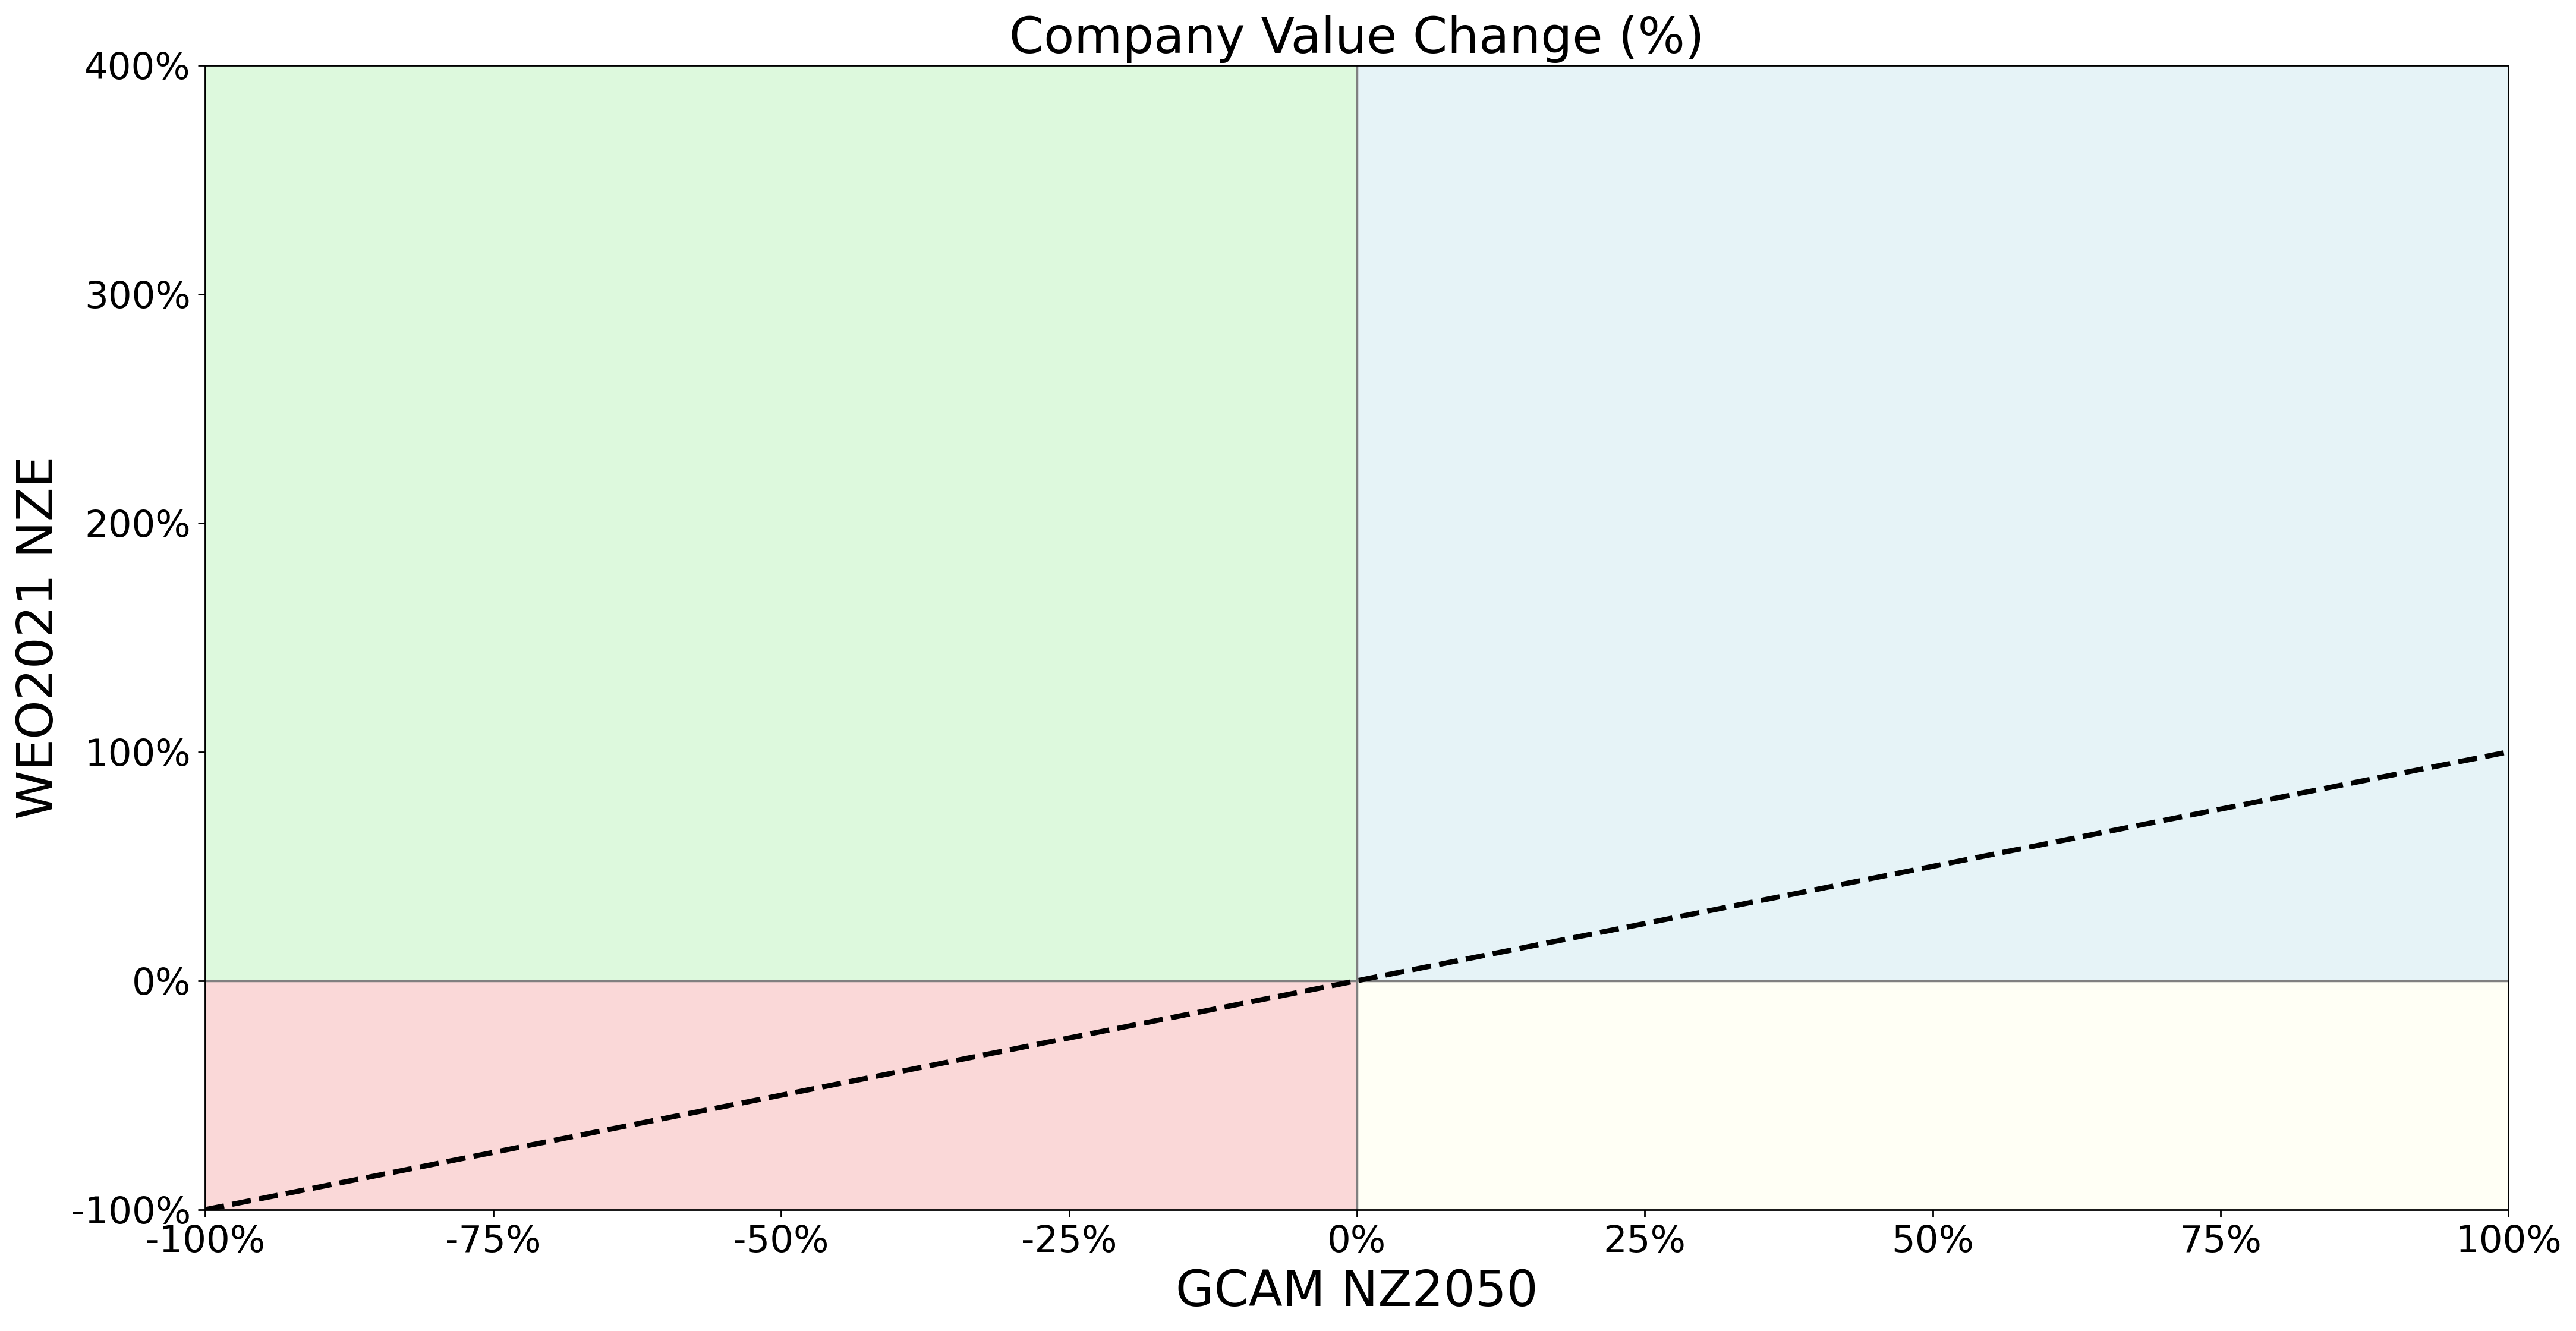

In [8]:
##Net ZERO PLots

###########Adjust Plots with 45°C line
######################################################################################################################################################
# Comparison value change ##Total
######################################################################################################################################################
plt.style.use(['default'])

#equity_company_value_changes_standard_nodup_reordered = equity_company_value_changes_standard_nodup_reordered[
#    equity_company_value_changes_standard_nodup_reordered['sector'] == 'Power'
#]

selected_scenario='WEO2021_NZE_2050' # CHANGE SCENARIO NAME HERE TO GENERATE DIFFERENT SCENARIOS
plt.figure(figsize=(20, 10), dpi=250) # CHANGE FIRST TWO NUMBERS TO CHANGE FONT SIZE AND DIMENSION OF CHART

colors = {'IPR2021_RPS':'red', 'NGFS2021_GCAM_NZ2050':'blue', 'Oxford2021_fast':'orange', 'NGFS2021_REMIND_NZ2050':'gray', 'WEO2021_NZE_2050':'blue','NGFS2021_MESSAGE_NZ2050':'purple'}
label = {'IPR2021_RPS':'IPR2021_RPS', 'NGFS2021_GCAM_NZ2050':'NGFS2021_GCAM_NZ2050', 'Oxford2021_fast':'NGFS2021_MESSAGE_NZ2050', 'NGFS2021_REMIND_NZ2050':'NGFS2021_REMIND_NZ2050', 'WEO2021_NZE_2050':'WEO2021_NZE_2050'}


plt.xlabel('GCAM NZ2050', fontsize=24) 
plt.ylabel('WEO2021 NZE', fontsize = 24)
plt.xlim(-1,1) # CHANGE HERE TO ZOOM ON DIFFERENT QUADRANTS
plt.ylim(-1,4) # CHANGE HERE TO ZOOM ON DIFFERENT QUADRANTS
plt.hlines(y=0, xmin=-90, xmax=90, linewidth=1, color="grey")
plt.vlines(x=0, ymin=-90, ymax=180, linewidth=1, color="grey")

# Define the coordinates for each quadrant
quadrant1_coords = [[-1, -1], [-1, 0], [0, 0], [0, -1]]
quadrant2_coords = [[-1, 0], [-1, 4], [0, 4], [0, 0]]
quadrant3_coords = [[0, 0], [0, 4], [1, 4], [1, 0]]
quadrant4_coords = [[0, -1], [0, 0], [1, 0], [1, -1]]

# Create polygons for each quadrant with desired colors
quadrant1_poly = Polygon(quadrant1_coords, facecolor='lightcoral', alpha=0.3)
quadrant2_poly = Polygon(quadrant2_coords, facecolor='lightgreen', alpha=0.3)
quadrant3_poly = Polygon(quadrant3_coords, facecolor='lightblue', alpha=0.3)
quadrant4_poly = Polygon(quadrant4_coords, facecolor='lightyellow', alpha=0.3)

# Add the polygons to the plot
ax = plt.gca()
ax.add_patch(quadrant1_poly)
ax.add_patch(quadrant2_poly)
ax.add_patch(quadrant3_poly)
ax.add_patch(quadrant4_poly)
#plt.scatter(equity_company_value_changes_standard_nodup_reordered[equity_company_value_changes_standard_nodup_reordered['shock_scenario']==selected_scenario]['GCAM_company_value_changes'], equity_company_value_changes_standard_nodup_reordered[equity_company_value_changes_standard_nodup_reordered['shock_scenario']==selected_scenario]['OtherScenarios_company_value_changes'],s = 8, c=equity_company_value_changes_standard_nodup_reordered[equity_company_value_changes_standard_nodup_reordered['shock_scenario']==selected_scenario]['shock_scenario'].map(colors), label=equity_company_value_changes_standard_nodup_reordered[equity_company_value_changes_standard_nodup_reordered['shock_scenario']==selected_scenario]['shock_scenario'])

plt.scatter(data[data['shock_scenario']==selected_scenario]['GCAM_company_value_changes'], data[data['shock_scenario']==selected_scenario]['net_present_value_rate_of_change'],s = 8, c=data[data['shock_scenario']==selected_scenario]['shock_scenario'].map(colors), label=data[data['shock_scenario']==selected_scenario]['shock_scenario'])

# Legend
legend_elements = [Patch(facecolor='red',  label='IPR2021_RPS'), 
                   #Patch(facecolor='blue', label='NGFS2021_GCAM_B2DS'),
                   Patch(facecolor='orange', label='Oxford2021_fast'),
                   Patch(facecolor='gray', label='NGFS2021_REMIND_NZ2050'),
                   Patch(facecolor='purple', label='NGFS2021_MESSAGE_NZ2050'),
                   Patch(facecolor='blue', label='WEO2021_NZE_2050')]

plt.title("Company Value Change (%)", fontsize = 24)
#plt.legend(handles=legend_elements)
plt.xticks(plt.xticks()[0], ['{:,.0%}'.format(x) for x in plt.xticks()[0]], fontsize = 18)
plt.yticks(plt.yticks()[0], ['{:,.0%}'.format(x) for x in plt.yticks()[0]], fontsize = 18)


# Add a 45° line
plt.plot([-1, 1], [-1, 1], linestyle='dashed', color=(0,0,0,1), linewidth = 2.5)


plt.show()

ValueError: zero-size array to reduction operation fmax which has no identity

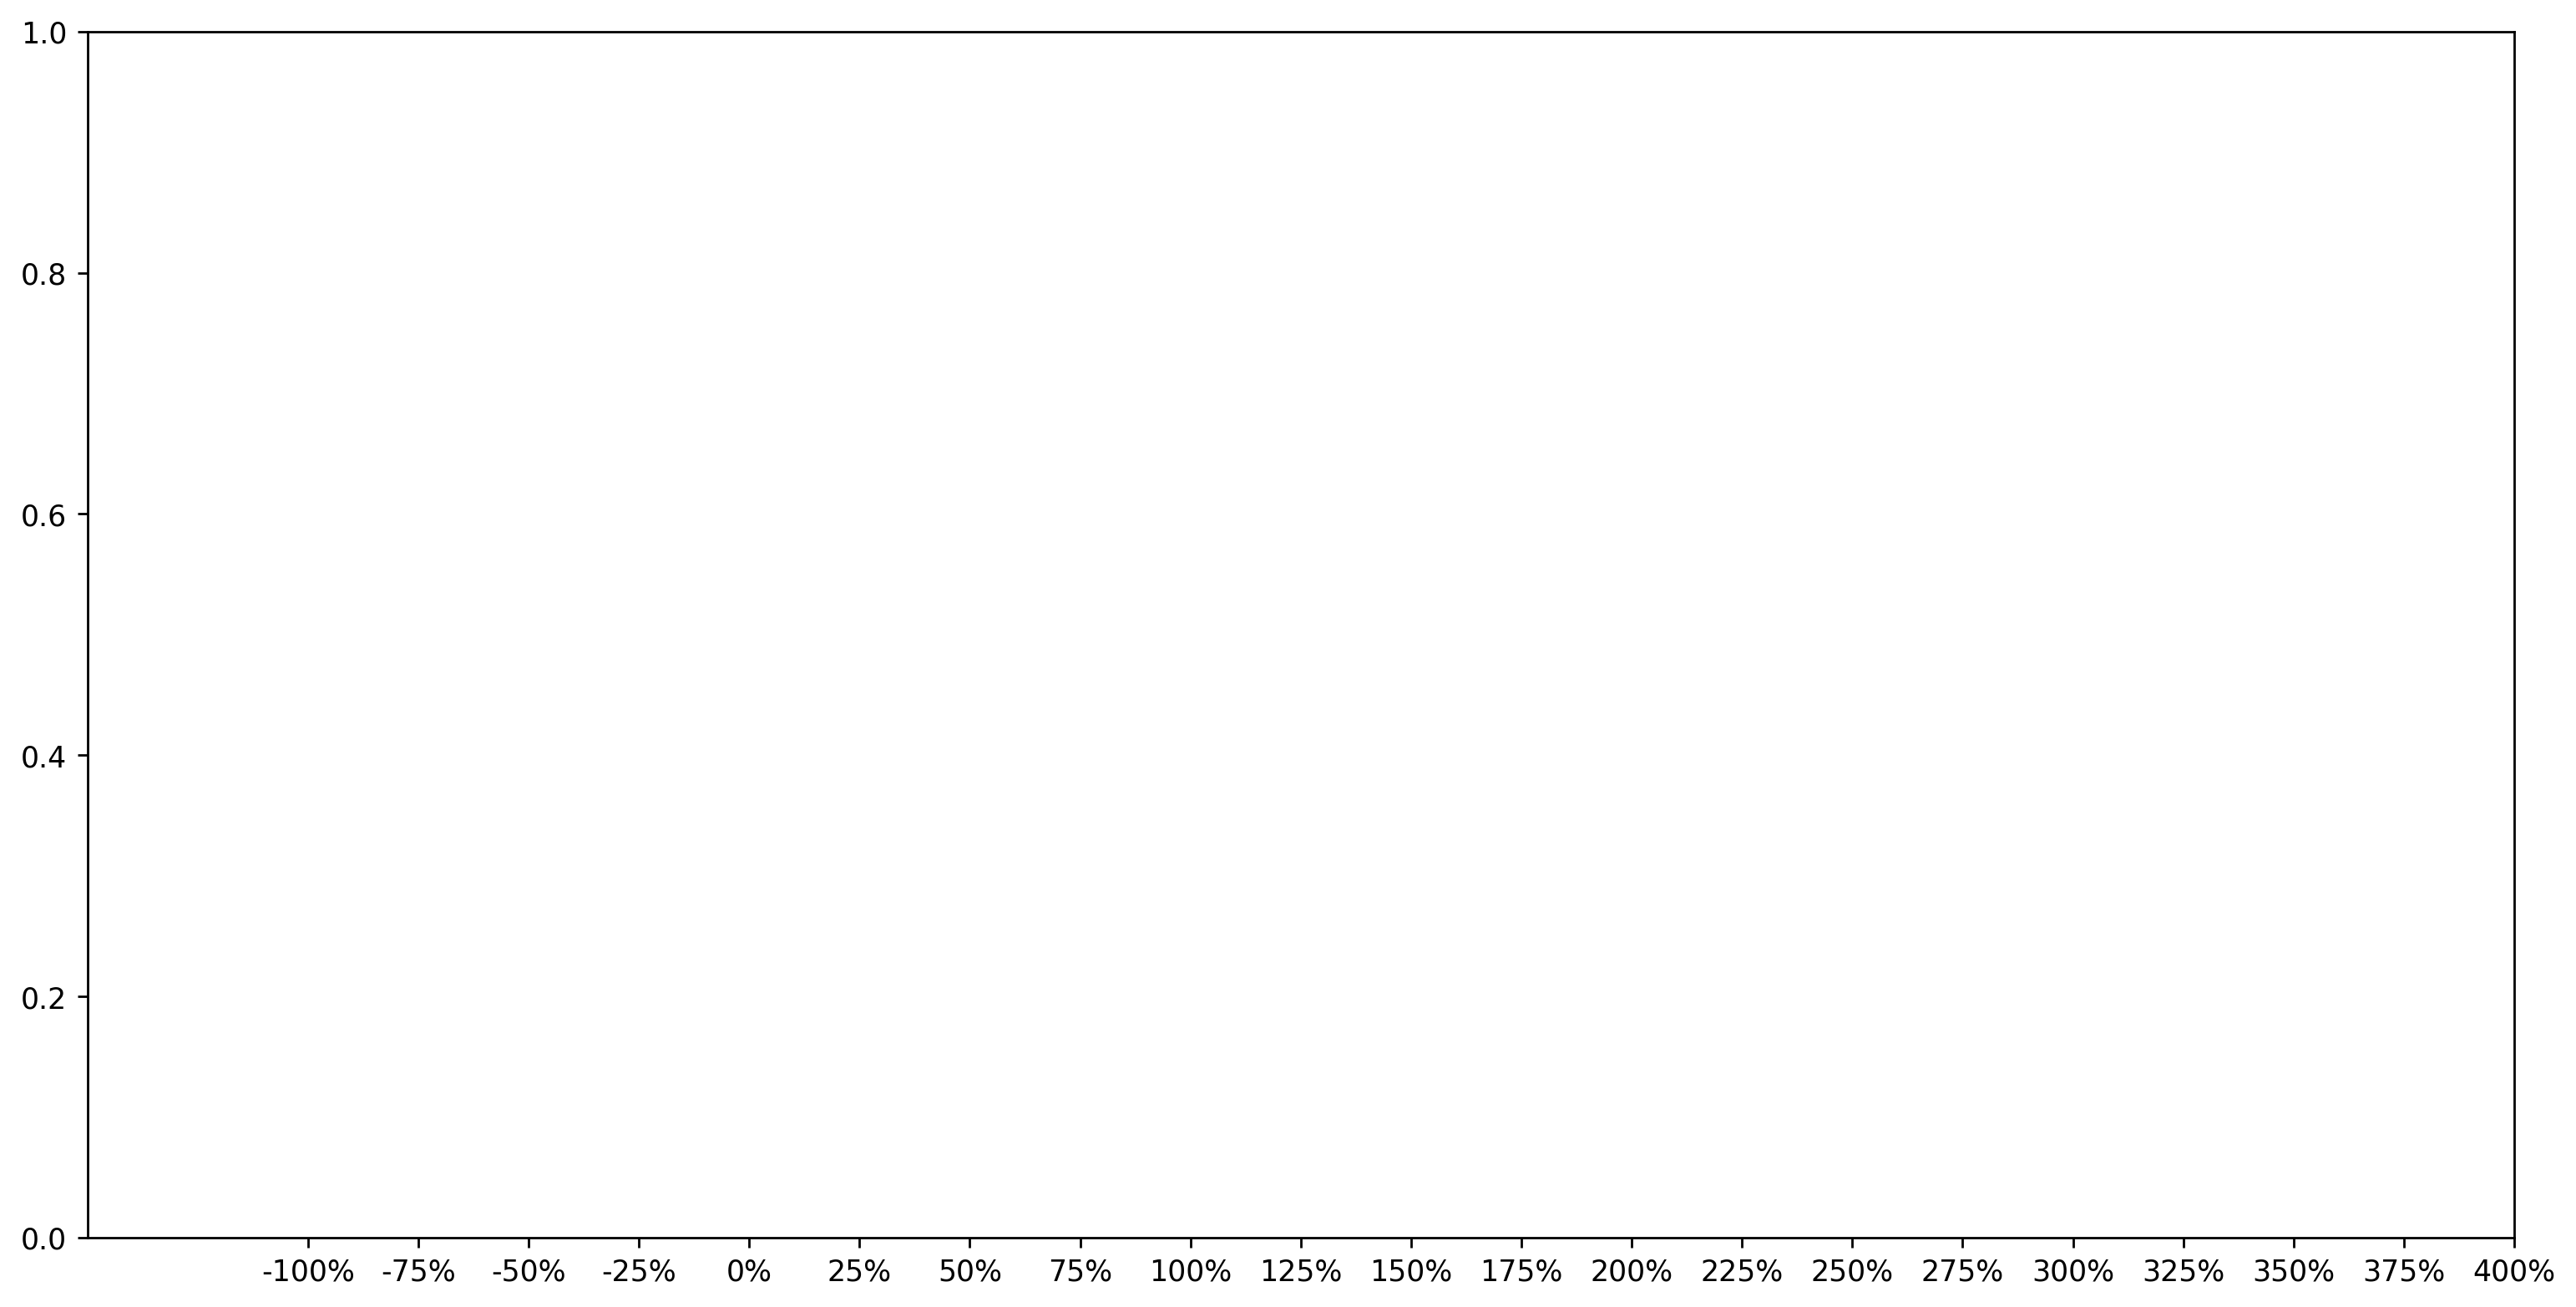

In [10]:
##NZ
#Chart settings
mpl.rcParams['font.family'] = 'Times New Roman'
plt.style.use('default')
plt.figure(figsize=(15, 7.5), dpi=250)# CHANGE FIRST TWO NUMBERS TO CHANGE FONT SIZE AND DIMENSION OF CHART
plt.xlim(-1.5,4)
plt.xticks(np.arange(-1, 4.25, 0.25), ['{:,.0%}'.format(x) for x in np.arange(-1, 4.25, 0.25)])

selected_sectors=["Power"] # CHANGE HERE TO SELECT ONLY SOME SECTORS

#colors = {'IPR2021_FPS':'red', 'IPR2021_RPS':'green', 'NGFS2021_GCAM_B2DS':'blue', 'Oxford2021_fast':'orange', 'NGFS2021_REMIND_B2DS':'gray', 'WEO2021_SDS':'blue'}


ax1=data[(data["shock_scenario"]=="IPR2021_RPS")& (data["sector"].isin(selected_sectors))]['net_present_value_rate_of_change'].plot(kind='density', label='IPR RPS', color ="red")
ax2=data[(data["shock_scenario"]=="NGFS2021_MESSAGE_NZ2050")& (data["sector"].isin(selected_sectors))]['net_present_value_rate_of_change'].plot(kind='density', label='MESSAGE NZ2050',color ="purple")
ax3=data[(data["shock_scenario"]=="NGFS2021_GCAM_NZ2050")& (data["sector"].isin(selected_sectors))]['net_present_value_rate_of_change'].plot(kind='density', label='GCAM NZ2050', color ="magenta")
ax4=data[(data["shock_scenario"]=="Oxford2021_fast")& (data["sector"].isin(selected_sectors))]['net_present_value_rate_of_change'].plot(kind='density', label='Oxford', color ="orange")
ax5=data[(data["shock_scenario"]=="NGFS2021_REMIND_NZ2050")& (data["sector"].isin(selected_sectors))]['net_present_value_rate_of_change'].plot(kind='density', label='REMIND NZ2050',color ="gray")
ax6=data[(data["shock_scenario"]=="WEO2021_NZE_2050")& (data["sector"].isin(selected_sectors))]['net_present_value_rate_of_change'].plot(kind='density', label='WEO2021 NZE', color ="blue")

plt.title("Distribution of Valuation Change", fontsize=24)
plt.xlabel('Valuation change', fontsize=24)
plt.ylabel('Density', fontsize=24)
plt.legend(fontsize=14)
vals = ax1.get_xticks()
plt.xticks(fontsize=12.5)
plt.yticks(fontsize=14)

ax1.set_xticklabels(['{:,.0%}'.format(x) for x in vals])


(array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,
         1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ]),
 [Text(0, -1.0, '−100%'),
  Text(0, -0.75, '−75%'),
  Text(0, -0.5, '−50%'),
  Text(0, -0.25, '−25%'),
  Text(0, 0.0, '0%'),
  Text(0, 0.25, '25%'),
  Text(0, 0.5, '50%'),
  Text(0, 0.75, '75%'),
  Text(0, 1.0, '100%'),
  Text(0, 1.25, '125%'),
  Text(0, 1.5, '150%'),
  Text(0, 1.75, '175%'),
  Text(0, 2.0, '200%'),
  Text(0, 2.25, '225%'),
  Text(0, 2.5, '250%'),
  Text(0, 2.75, '275%'),
  Text(0, 3.0, '300%')])

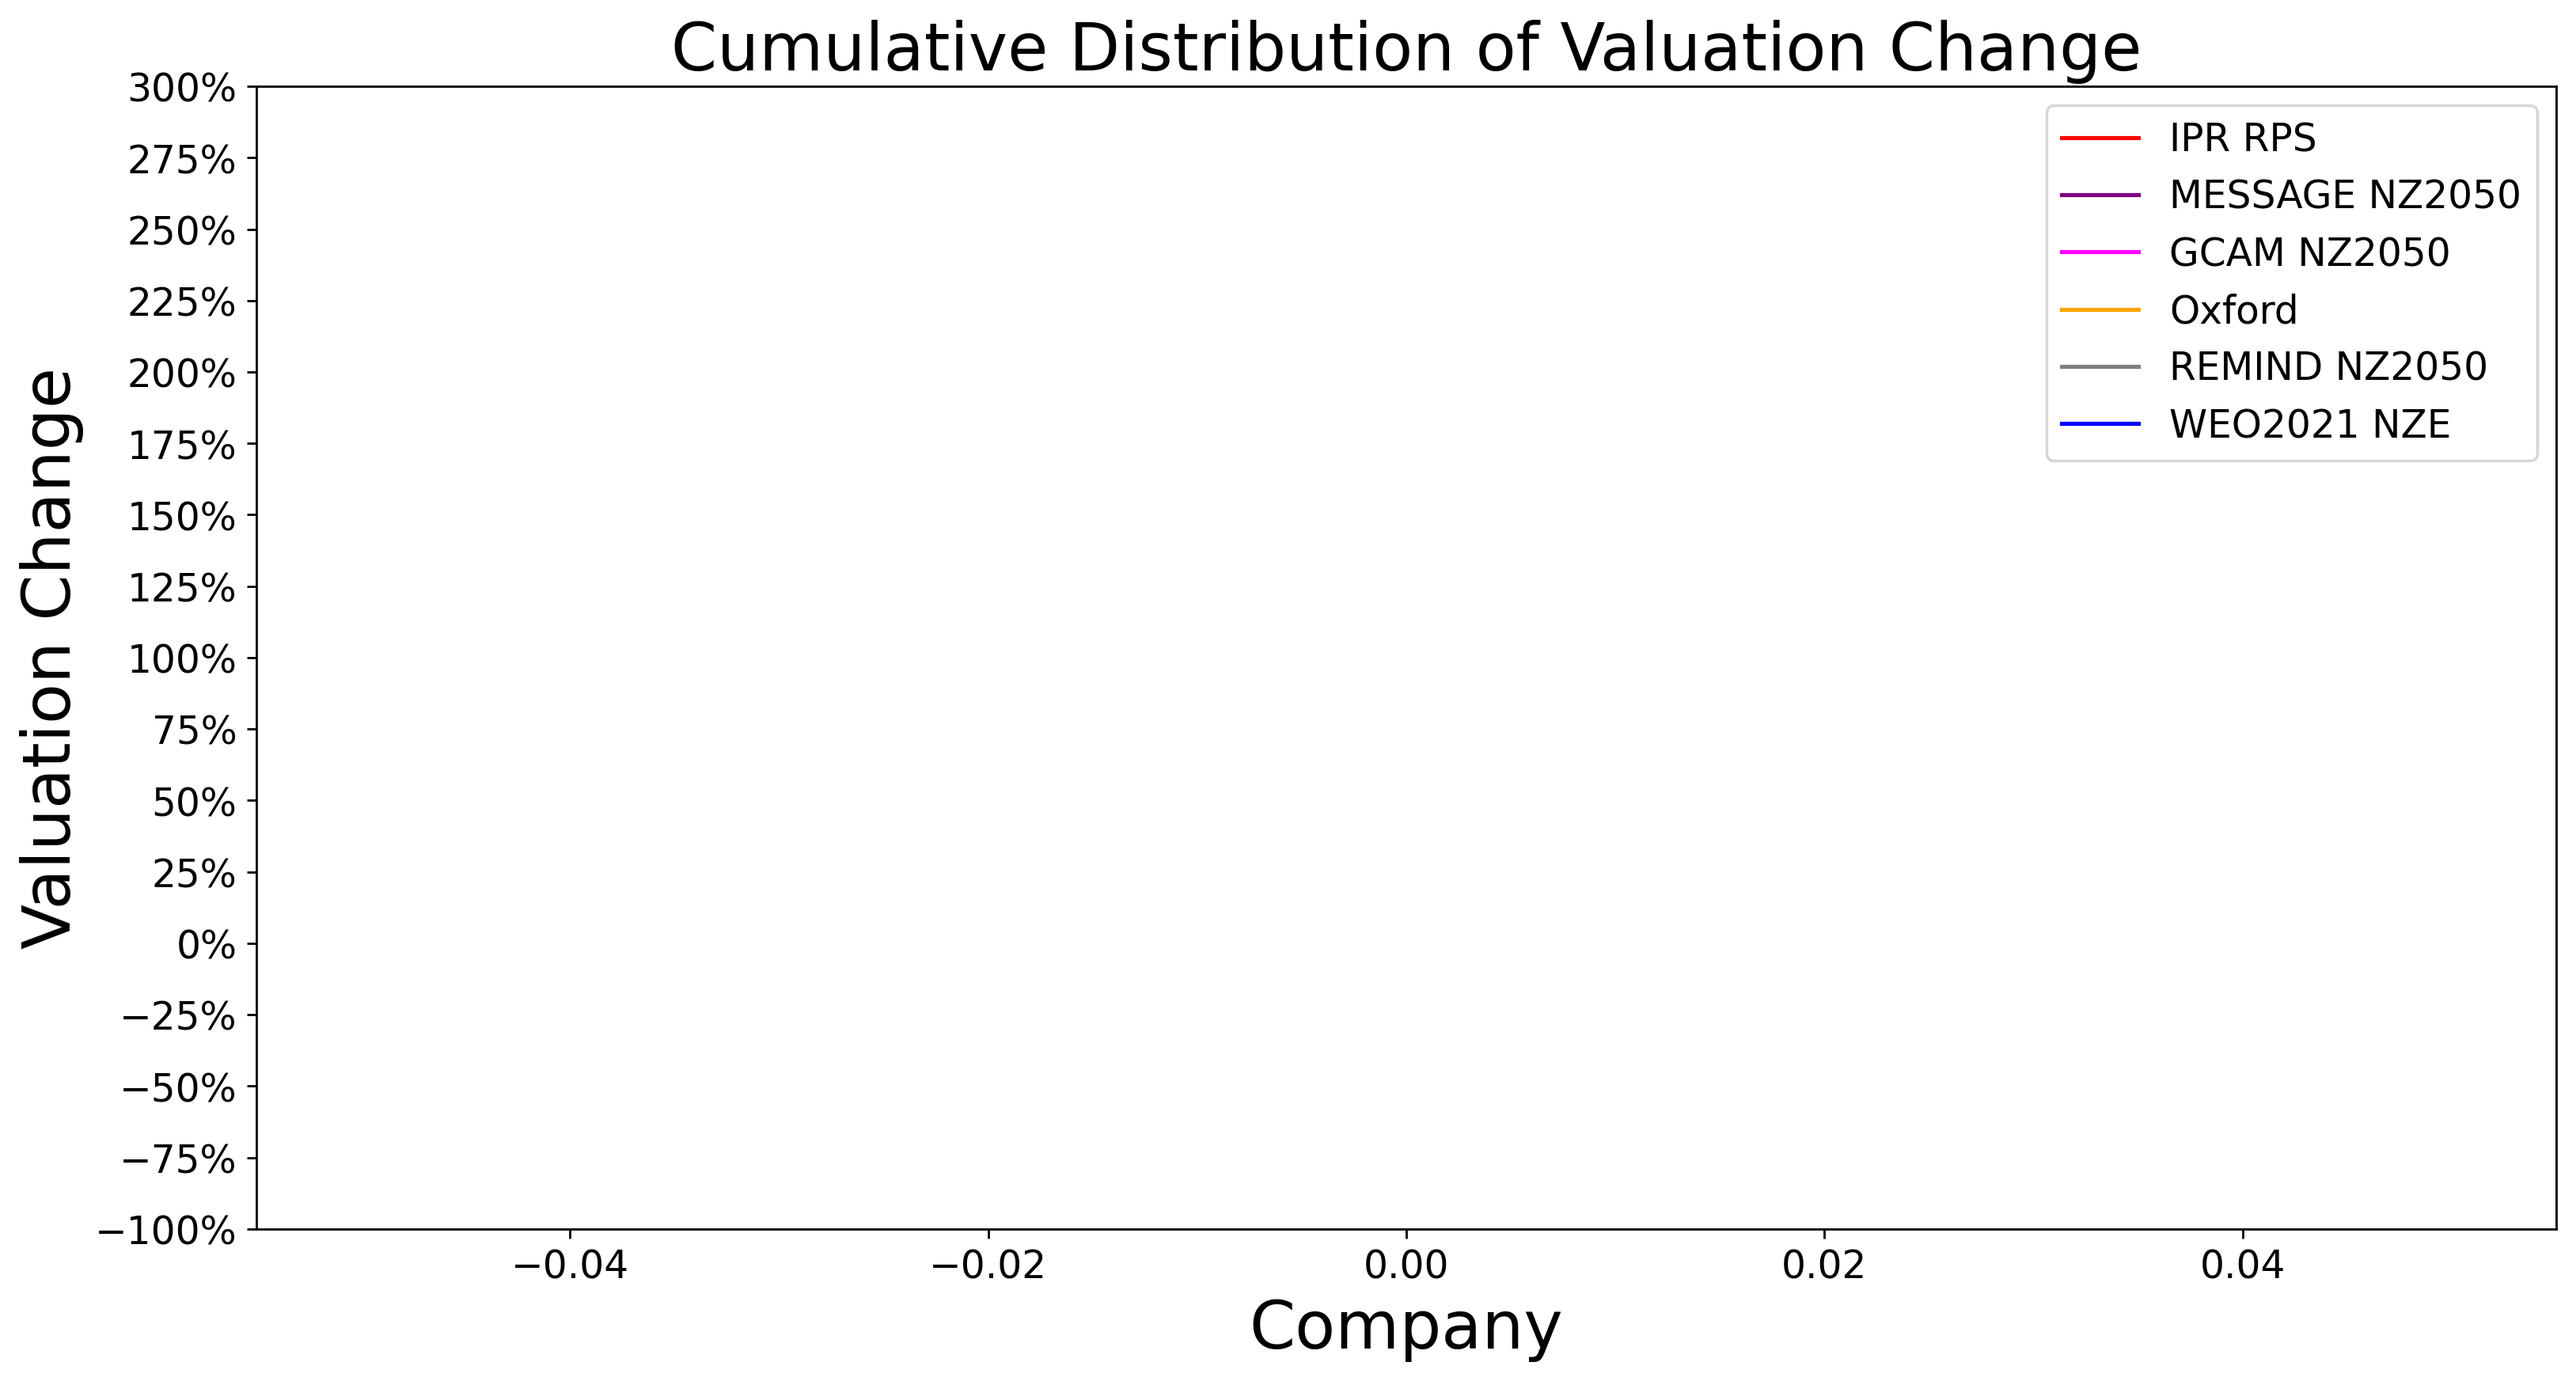

In [9]:
########################################################################################################################################################
# NZE
########################################################################################################################################################

#Chart settings
mpl.rcParams['font.family'] = 'Times New Roman'
plt.style.use('default')
plt.figure(figsize=(15, 7.5), dpi=250) # CHANGE FIRST TWO NUMBERS TO CHANGE FONT SIZE AND DIMENSION OF CHART
selected_sectors=["Power"] # CHANGE HERE TO SELECT ONLY SOME SECTORS


plt.plot(data[(data["shock_scenario"]=="IPR2021_RPS")&(data["sector"].isin(selected_sectors))]['net_present_value_rate_of_change'].sort_values().to_numpy(), label='IPR RPS', color="red")
plt.plot(data[(data["shock_scenario"]=="NGFS2021_MESSAGE_NZ2050")&(data["sector"].isin(selected_sectors))]['net_present_value_rate_of_change'].sort_values().to_numpy(),label='MESSAGE NZ2050', color="purple")
plt.plot(data[(data["shock_scenario"]=="NGFS2021_GCAM_NZ2050")&(data["sector"].isin(selected_sectors))]['net_present_value_rate_of_change'].sort_values().to_numpy(),label='GCAM NZ2050', color="magenta")
plt.plot(data[(data["shock_scenario"]=="Oxford2021_fast")&(data["sector"].isin(selected_sectors))]['net_present_value_rate_of_change'].sort_values().to_numpy(),label='Oxford', color="orange")
plt.plot(data[(data["shock_scenario"]=="NGFS2021_REMIND_NZ2050")&(data["sector"].isin(selected_sectors))]['net_present_value_rate_of_change'].sort_values().to_numpy(),label='REMIND NZ2050', color="gray")
plt.plot(data[(data["shock_scenario"]=="WEO2021_NZE_2050")&(data["sector"].isin(selected_sectors))]['net_present_value_rate_of_change'].sort_values().to_numpy(),label='WEO2021 NZE', color="blue")


plt.ylabel('Valuation Change', fontsize=24)
plt.xlabel('Company', fontsize=24)
plt.title("Cumulative Distribution of Valuation Change", fontsize = 24)
plt.legend(fontsize=14)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
plt.yticks(np.arange(-1, 3.25, 0.25))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
